In [375]:
# First import all required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

In [376]:
# define variables for the csv files, this step is not mandatory 
#but it will help to understand the importing data step in Python
File_1 = "advertising.csv"

In [377]:
# Read the csv file into a dataframe
df = pd.read_csv(File_1)

In [378]:
# Be sure that the file is imported by viewing the dataframe

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [379]:
# Check for completeness of data and ensure no Null or missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [380]:
# summary statistics 
summary_stats = df.describe()
print(summary_stats)

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


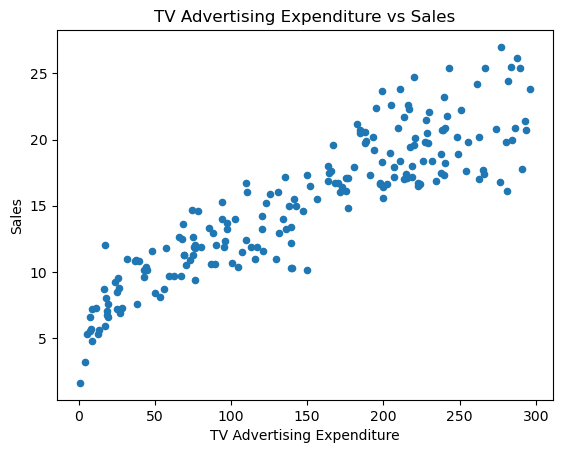

In [381]:
df.plot(kind = 'scatter', x = 'TV', y = 'Sales')
plt.title('TV Advertising Expenditure vs Sales')
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.show()

In [382]:
# Remove outliers by removing rows where 'TV' column has values in the list and then check for completeness
values_to_remove = [0.7, 4.1, 17.2, 139.5, 140.3, 149.8, 276.7, 280.7, 290.7]
df = df[~df['TV'].isin(values_to_remove)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         190 non-null    float64
 1   Radio      190 non-null    float64
 2   Newspaper  190 non-null    float64
 3   Sales      190 non-null    float64
dtypes: float64(4)
memory usage: 7.4 KB


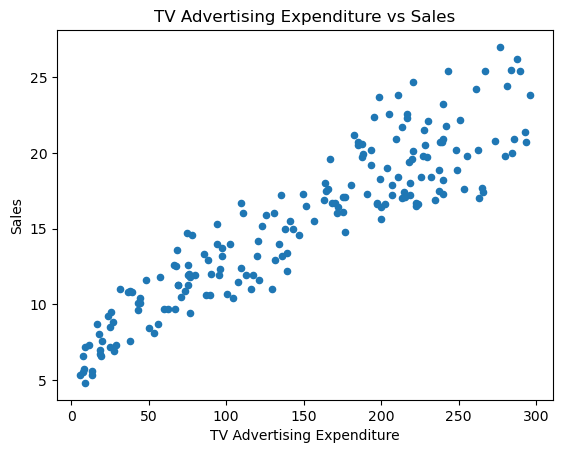

In [384]:
df.plot(kind = 'scatter', x = 'TV', y = 'Sales')
plt.title('TV Advertising Expenditure vs Sales')
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.show()

In [366]:
# features and labels have to be in 2D array

x = df[['TV']]

In [367]:
y = df[['Sales']]

In [368]:
# Need separate training and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1540)

In [369]:
# Implement linear regression model 

model = LinearRegression()

In [370]:
model.fit(x_train, y_train)

LinearRegression()

In [371]:
y_pred = model.predict(x_test)

In [372]:
print(f'coefficient of determination is {r2_score(y_test, y_pred)}')

coefficient of determination is 0.9050313007551377


In [373]:
new_TV = [[147.04]]
predicted_value = model.predict(new_TV)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [374]:
print(f'Predicted Sales for 147.04 is {predicted_value[0]}')

Predicted Sales for 147.04 is [15.37507351]
